In [1]:
import numpy as np
from matplotlib import pyplot as plt


def rotate_vec(vector, n):
    rotation_matrices = {
        0: np.array([[1, 0], [0, 1]]),    # 0 degrees
        1: np.array([[0, -1], [1, 0]]),   # 90 degrees
        2: np.array([[-1, 0], [0, -1]]),  # 180 degrees
        3: np.array([[0, 1], [-1, 0]])    # 270 degrees
    }
    
    roated_vector = rotation_matrices[n] @ vector
    return roated_vector


def segment_point(p1,p2):
    v1 = np.array(np.array(p2)-np.array(p1))
    relative_length = np.linalg.norm(v1)/4
    v1 = v1/np.linalg.norm(v1)
    v2 = np.array([0.0,1.0])
    angle = np.arctan2(v1[1], v1[0])
    angle_degrees = np.degrees(angle)
    angle_degrees = angle_degrees % 360
    n = round(angle_degrees / 90) % 4
    vectors_list = [[relative_length, 0.0], 
                    [0.0, relative_length], 
                    [relative_length, 0.0], 
                    [0.0, -relative_length], 
                    [0.0, -relative_length], 
                    [relative_length, 0.0], 
                    [0.0, relative_length]]
    point = np.array(p1)
    points_list = [p1]
    for vectors in vectors_list:
        roatated_vec = rotate_vec(vectors,n)
        point = point + roatated_vec
        points_list.append(np.round(point).tolist())
    return points_list

def new_line(line):
    new_line = []
    for i in range(0,len(line)-1):
        segment_points = segment_point(line[i], line[i+1]) 
        new_line = new_line + segment_points
    new_line.append(line[-1])
    return new_line

def fract(l, line):
    for _i in range(0,l):
        line = new_line(line)
    return line

def plotting_line(l, size):
    line = [[0.0,0.0], [size,0.0]]
    for i in range(0,l+1):
        line = fract(i,line)
        x_cords = [i[0] for i in line]
        y_cords = [i[1] for i in line]
        plt.plot(x_cords,y_cords)
    plt.show()

def plotting_square(l,size):
    for i in range(0,l+1):
        total_points = generate_square_without_shift(i, size)
        x_cords = [i[0] for i in total_points]
        y_cords = [i[1] for i in total_points]
        plt.plot(x_cords,y_cords)
    plt.show()


def generate_square_without_shift(l,size):
    lines = [
        [[0.0, 0.0], [size, 0.0]],  
        [[size, 0.0], [size, size]],
        [[size, size], [0.0, size]],
        [[0.0, size], [0.0, 0.0]]
        ]
    total_points = []
    for line in lines:
        line = fract(l,line)
        total_points = total_points + line
    min_x = min([i[0] for i in total_points])
    min_y = min([i[1] for i in total_points])
    print(min_x,min_y)
    total_points = [i + [min_x,min_y] for i in total_points]
    return total_points

    
def generate_square(l, size):
    lines = [
        [[0.0, 0.0], [size, 0.0]],  
        [[size, 0.0], [size, size]],
        [[size, size], [0.0, size]],
        [[0.0, size], [0.0, 0.0]]
    ]
    
    total_points = []
    
    for line in lines:
        line_points = fract(l, line)  
        total_points.extend(line_points)  

    min_x = min(point[0] for point in total_points)
    min_y = min(point[1] for point in total_points)

    adjusted_points = [[point[0] - min_x, point[1] - min_y] for point in total_points]
    return adjusted_points


0.0 0.0
-16.0 -16.0
-20.0 -20.0
-21.0 -21.0


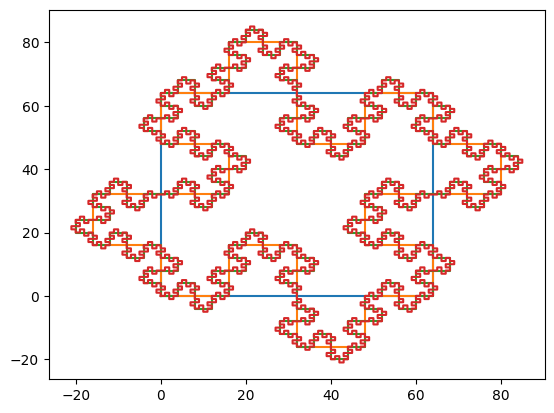

In [26]:
plotting_square(3,4**3)

In [2]:
def does_intersect(x1,x2,point):
    if x1[1] > x2[1]:
        x1, x2 = x2, x1
    if x1[1] == point[1] or x2[1] == point[1]:
        point[1] =  point[1] + 0.001
    
    if x1[1] <= point[1] < x2[1]: 
        
        x_intersect = (point[1] - x1[1]) * (x2[0] - x1[0]) / (x2[1] - x1[1]) + x1[0]
        return x_intersect > point[0] 

    return False



def in_boundry(point,boundry):    
    n = len(boundry)
    num_of_intersect = 0
    for i in range(n):
        p1 = boundry[i]
        p2 = boundry[(i+1)%n]
        if does_intersect(p1,p2, point) :
            num_of_intersect +=1
    if num_of_intersect % 2 == 1:
        return True
    else:
        return False
    
test_point = [-20,-20]
boundry = generate_square(3, 4**3)
in_boundry(test_point, boundry )


False

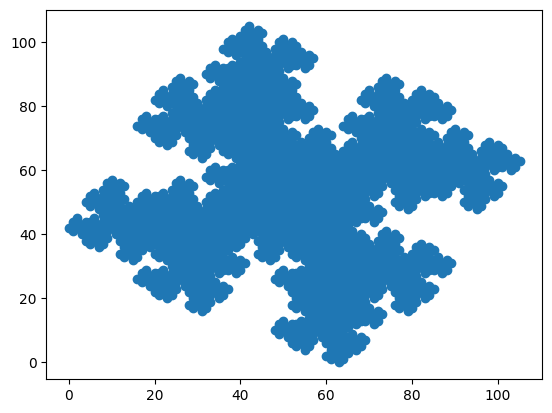

In [5]:
def generate_grid(l):
    boundry = generate_square(l, 4**l)
    x_boundry = [i[0] for i in boundry]
    y_boundry = [i[1] for i in boundry]
    min_x = int(min(x_boundry))
    max_x = int(max(x_boundry))
    min_y = int(min(y_boundry))
    max_y = int(max(y_boundry))
    grid_x = [i for i in range(min_x,max_x)]
    grid_y = [i for i in range(min_y,max_y)]
    grid = [[grid_x[j], grid_y[i]] for i in range(len(grid_y)) for j in range(len(grid_x))]
    grid_inside_boundry = [i for i in grid if in_boundry(i,boundry)]
    return grid, grid_inside_boundry, boundry

test_grid = generate_grid(3)[1]
test_boundry = generate_square(3,4**3)

x_cords = [i[0] for i in test_grid]
y_cords = [i[1] for i in test_grid]

plt.scatter(x_cords,y_cords)    


In [94]:
def discrete_laplacian(vector_length, row_length):
    total_array = []
    for i in range(vector_length):
        new_array = np.zeros(vector_length)
        
        next_x = i + 1
        next_y = i + row_length
        previous_x = i - 1
        previous_y = i - row_length
        
        if next_x < vector_length and (i % row_length) < (row_length - 1):
            new_array[next_x] = -1
        if next_y < vector_length and (i // row_length) < (row_length - 1):
            new_array[next_y] = -1
        if previous_x >= 0 and (i % row_length) > 0:  
            new_array[previous_x] = -1
        if previous_y >= 0 and (i // row_length) > 0: 
            new_array[previous_y] = -1
        
        new_array[i] = 4 
        total_array.append(new_array)
    
    return np.array(total_array), row_length

def system_laplacian(vector_length, row_length, boundry):
    laplacian_matrix = discrete_laplacian(vector_length, row_length)[0]
    points_list = []
    points_outside = []
    for i in range(0,vector_length):
        point = [i % row_length, i // row_length]
        points_list.append(point)
        if not in_boundry(point, boundry):
            laplacian_matrix[i] = np.zeros(vector_length)
            points_outside.append(point)
    return laplacian_matrix, points_outside, points_list

    

In [95]:
grid, grid_in_system, boundry = generate_grid(3)
x_collum = [i[0] for i in grid]
y_collum = [i[1] for i in grid]

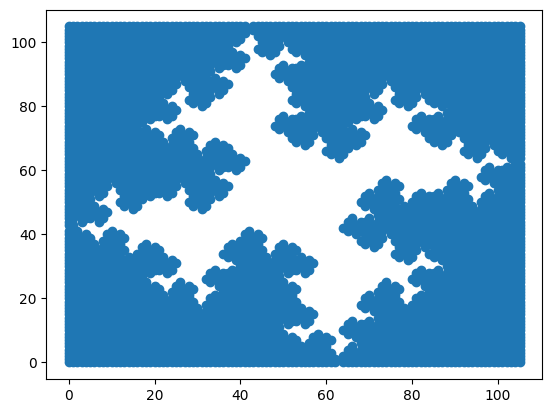

In [99]:
laplician, points_outside, points = system_laplacian(len(grid),max(x_collum)+1, boundry)
x_points = [point[0] for point in points_outside]
y_points = [point[1] for point in points_outside]
plt.scatter(x_points,y_points)

In [100]:
from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(laplician, k=10, which='SM')

print("E-value: ", eigenvalues)




E-value:  [0.01934741 0.04086374 0.04086374 0.0423333  0.04313214 0.04952054
 0.04952054 0.06685732 0.07570111 0.07995859]


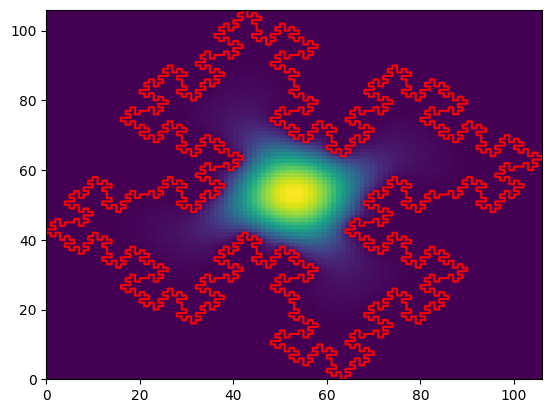

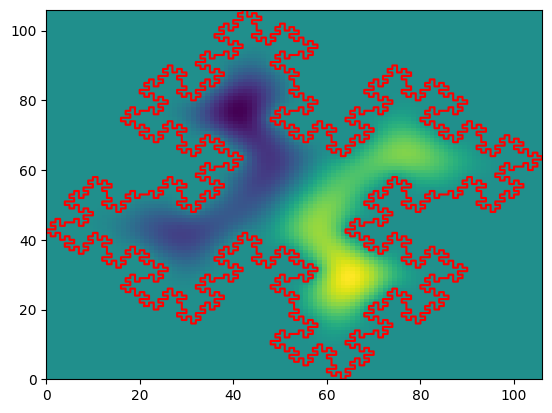

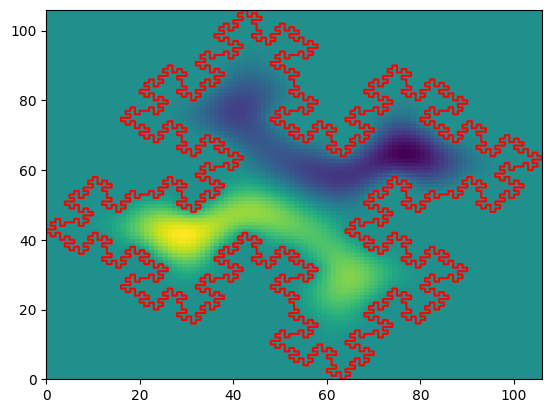

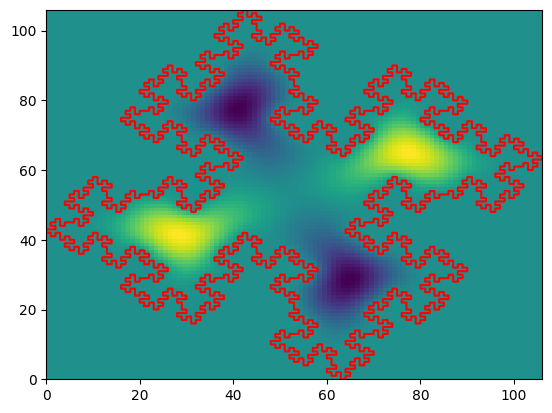

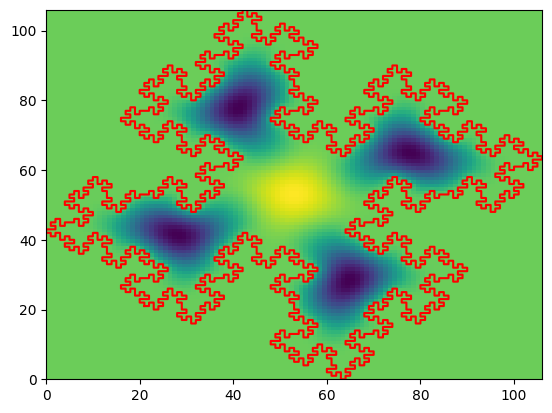

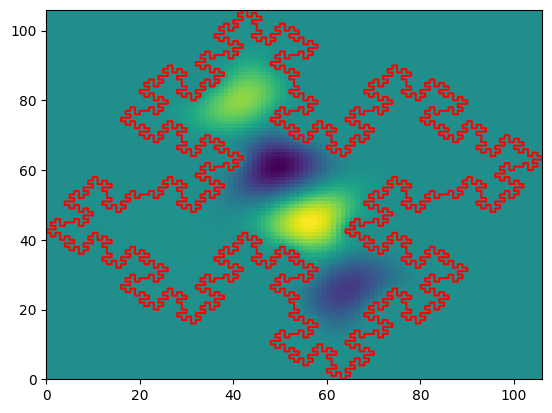

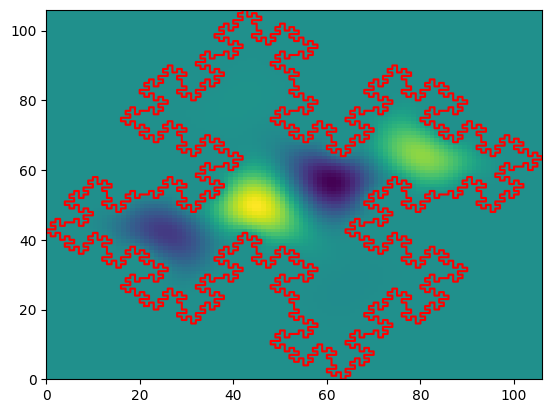

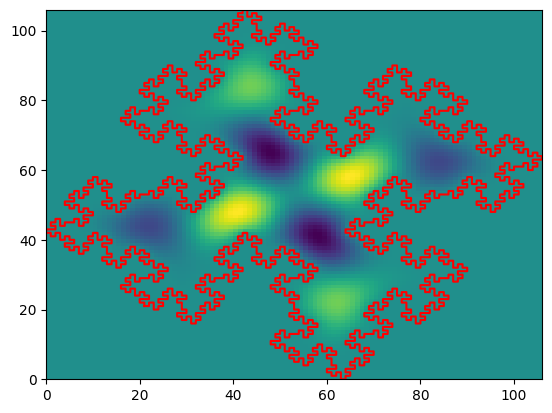

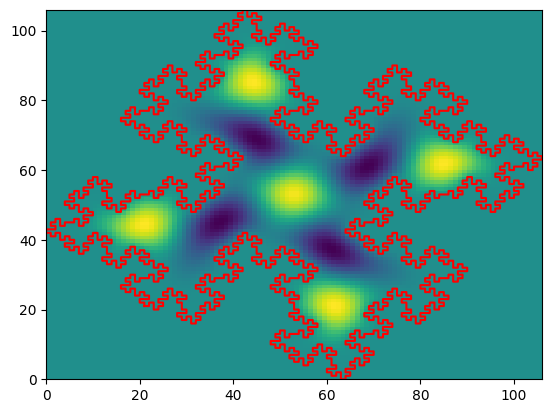

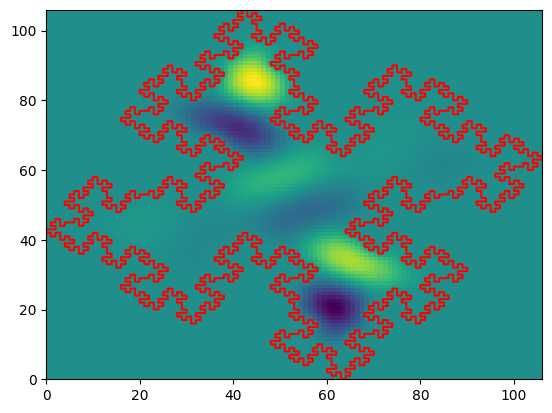

In [106]:
x_boundry = [i[0] for i in boundry]
y_boundry = [i[1] for i in boundry]


X, Y = np.meshgrid(x_collum, y_collum)

max_dim = int(np.sqrt(len(eigenvectors[:,0])))

for i in range(0,10):
    vibrations = eigenvectors[:, i].reshape(max_dim,max_dim)
    plt.imshow(vibrations, extent=(0, max_dim, 0, max_dim), origin='lower', cmap='viridis', aspect='auto')
    plt.plot(x_boundry,y_boundry, color="r")
    plt.show()